# Load a dataset

In [1]:
# Perform imports and load the dataset:
import pandas as pd

In [2]:
df = pd.read_csv("smsspamcollection.csv",encoding="ISO-8859-1")
df.shape

(5572, 2)

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Checking for null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
# Checking Duplicate values
df.duplicated().sum()

403

In [7]:
# Drop Duplicate values
df=df.drop_duplicates()
df.shape

(5169, 2)

In [8]:
# renaming the columns
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [11]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

We have 4516 ham messages and 653 spam messages

In [12]:
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

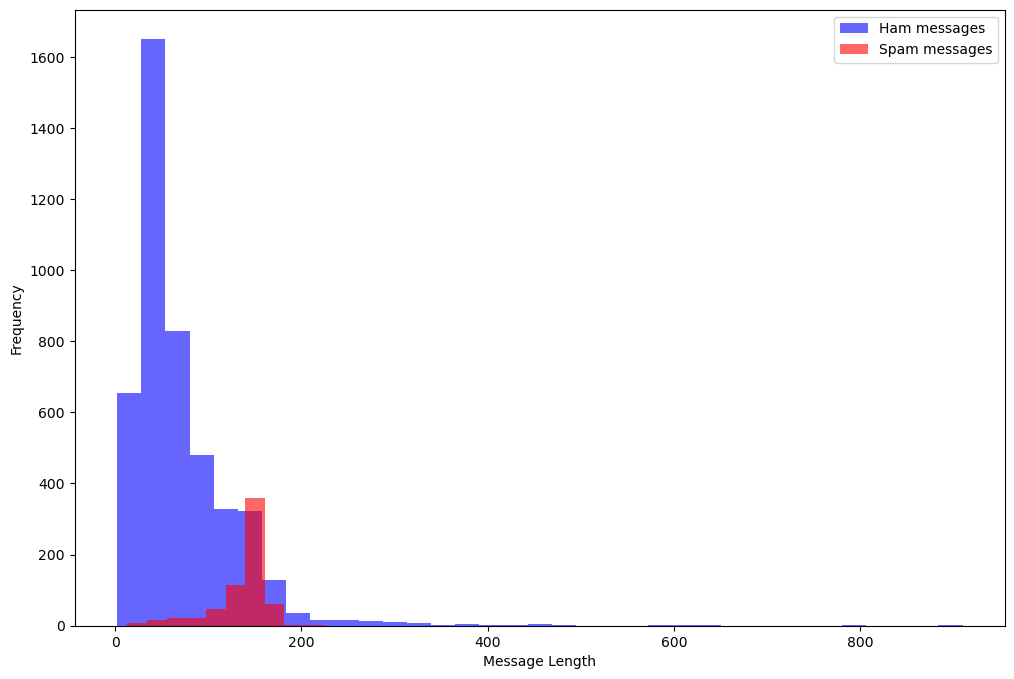

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [15]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4516.0,4516.000000
mean,0.0,70.459256
std,0.0,56.358207
min,0.0,2.000000
25%,0.0,34.000000
50%,0.0,52.000000
75%,0.0,90.000000
max,0.0,910.000000


In [16]:
df[df.label=='spam'].describe()

,label_num,message_len
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


# Text Pre-Processing

In [17]:
# import library
import re
import string
import nltk
from nltk.corpus import stopwords

In [18]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

In [19]:
stemmer = nltk.SnowballStemmer("english")

In [20]:
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text

In [21]:
df['message_clean'] = df['message'].apply(preprocess)
df.head(20)

,label,message,label_num,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,freemsg hey darl week word back id like fun s...
6,ham,Even my brother is not like to speak with me. ...,0,77,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,1,158,winner valu network custom select receivea pr...
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,mobil month r entitl updat latest colour mobi...


In [22]:
print(df['message_clean'][304])

sms ac blind date    aberdeen unit kingdom check   blind date send hide


In [23]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 186.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/300.2 kB 231.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 425.3 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 573.4 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 679.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 638.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


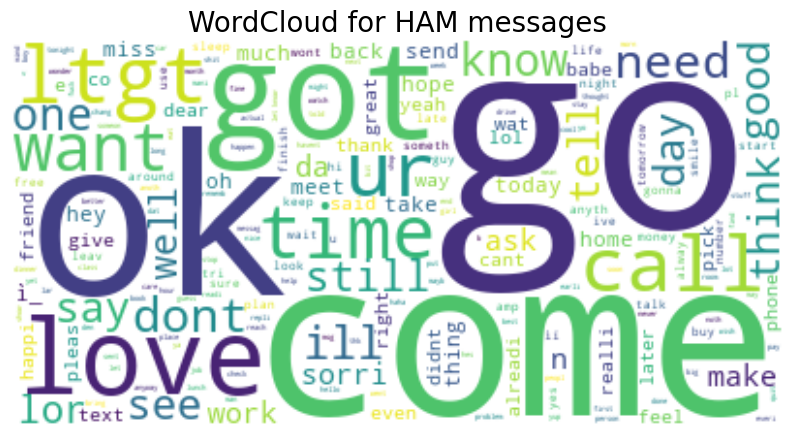

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

# Generate the WordCloud using text data for HAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 'ham', 'message_clean'])
wc.generate(ham_text)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for HAM messages', fontsize=20)
plt.axis('off')
plt.show()

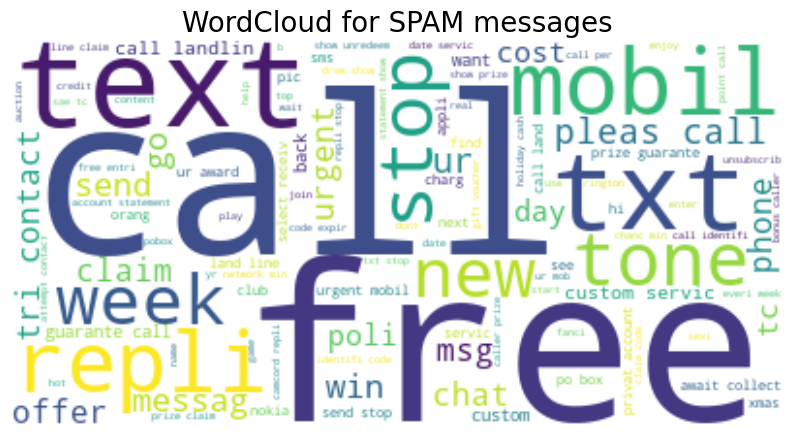

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

# Generate the WordCloud using text data for SPAM messages
ham_text = ' '.join(text for text in df.loc[df['label'] == 'spam', 'message_clean'])
wc.generate(ham_text)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for SPAM messages', fontsize=20)
plt.axis('off')
plt.show()

# Vectorization

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(df['message_clean'])
y = df['label']

# Modeling

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [28]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)

# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

# Performance Evaluation

In [30]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  # Importing accuracy_score

# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)

# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)

In [31]:
nb_cm

array([[1107,    0],
       [  62,  124]], dtype=int64)

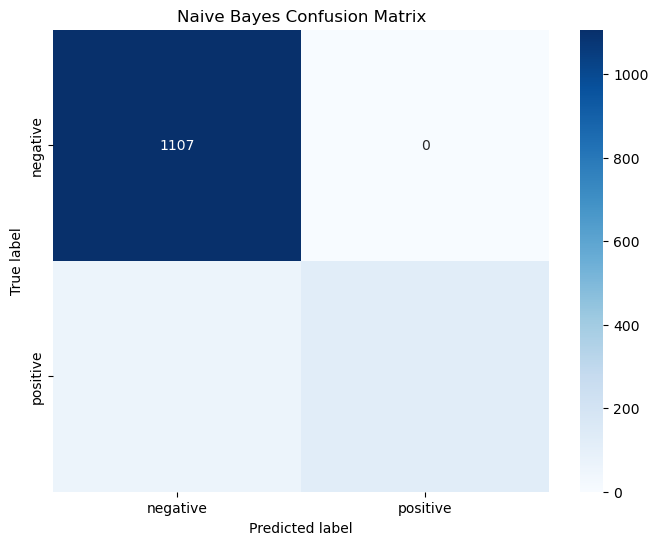

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1107
        spam       1.00      0.67      0.80       186

    accuracy                           0.95      1293
   macro avg       0.97      0.83      0.89      1293
weighted avg       0.95      0.95      0.95      1293


Naive Bayes Error Rate: 0.05


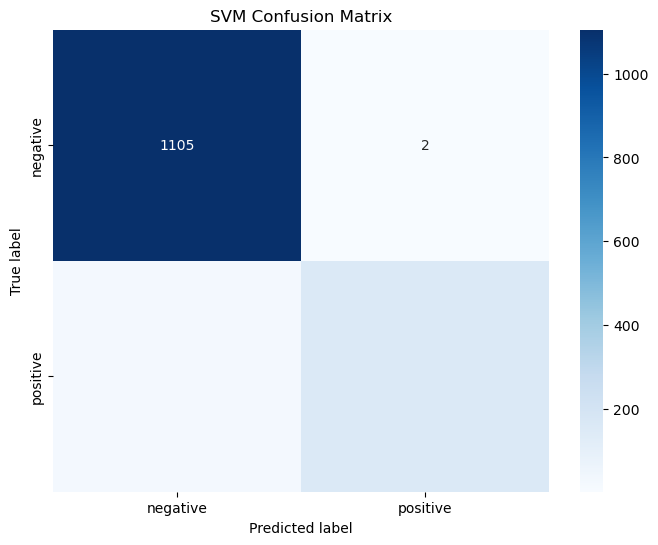


SVM Classifier Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1107
        spam       0.99      0.85      0.92       186

    accuracy                           0.98      1293
   macro avg       0.98      0.93      0.95      1293
weighted avg       0.98      0.98      0.98      1293


SVM Error Rate: 0.02


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")
